# Исследование компьютерных игр

Мы проведём исследование для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Нам нужно выявить определяющие успешность игры закономерности. Это позволит нам сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


**Цель исследования** – выявить закономерности, определяющие успешность игры, которые позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Гипотезы исследования:** 
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Мы посмотрим:**
* Сколько игр выпускалось в разные годы и узнаем, важны ли данные за все периоды.
* Как менялись продажи по платформам – выберем платформы с наибольшими суммарными продажами и построим распределение по годам.
* Какой период для нашего исследования будет актуальным – данные за этот период помогут построить прогноз на 2017 год.
* Какие платформы лидируют по продажам и выберем несколько потенциально прибыльных платформ.
* Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
* На общее распределение игр по жанрам – узнаем, что можно сказать о самых прибыльных жанрах и выделяются ли жанры с высокими и низкими продажами.
* Портреты пользователей.
* Подтвердятся ли гипотезы.

**Ход исследования** 
1. Обзор данных.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Статистический анализ данных – проверка гипотез.
5. Подведение итогов и формулирование общего вывода.

**Описание данных:**

`Name` — название игры \
`Platform` — платформа \
`Year_of_Release` — год выпуска \
`Genre` — жанр игры \
`NA_sales` — продажи в Северной Америке (миллионы проданных копий) \
`EU_sales` — продажи в Европе (миллионы проданных копий) \
`JP_sales` — продажи в Японии (миллионы проданных копий) \
`Other_sales` — продажи в других странах (миллионы проданных копий) \
`Critic_Score` — оценка критиков (максимум 100) \
`User_Score` — оценка пользователей (максимум 10) \
`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


## 1. Обзор данных

In [1]:
# настроим нашу тетрадку так, чтобы все графики были картинками (пригодится для github)
%pip install -U kaleido -q
import plotly.io as pio
pio.renderers.default = "png"

# импортируем библиотеки, которые пригодятся нам в ходе анализа
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import stats as st

Note: you may need to restart the kernel to use updated packages.


Откроем файл с данными и изучим общую информацию.

In [2]:
df = pd.read_csv('/Users/polinamokretsova/games.csv')
df.info() # выводим общую информацию о датафрэйме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
# изучим первые 10 строк датафрэйма
df.head(10) 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# получим список характерных значений для наших данных
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


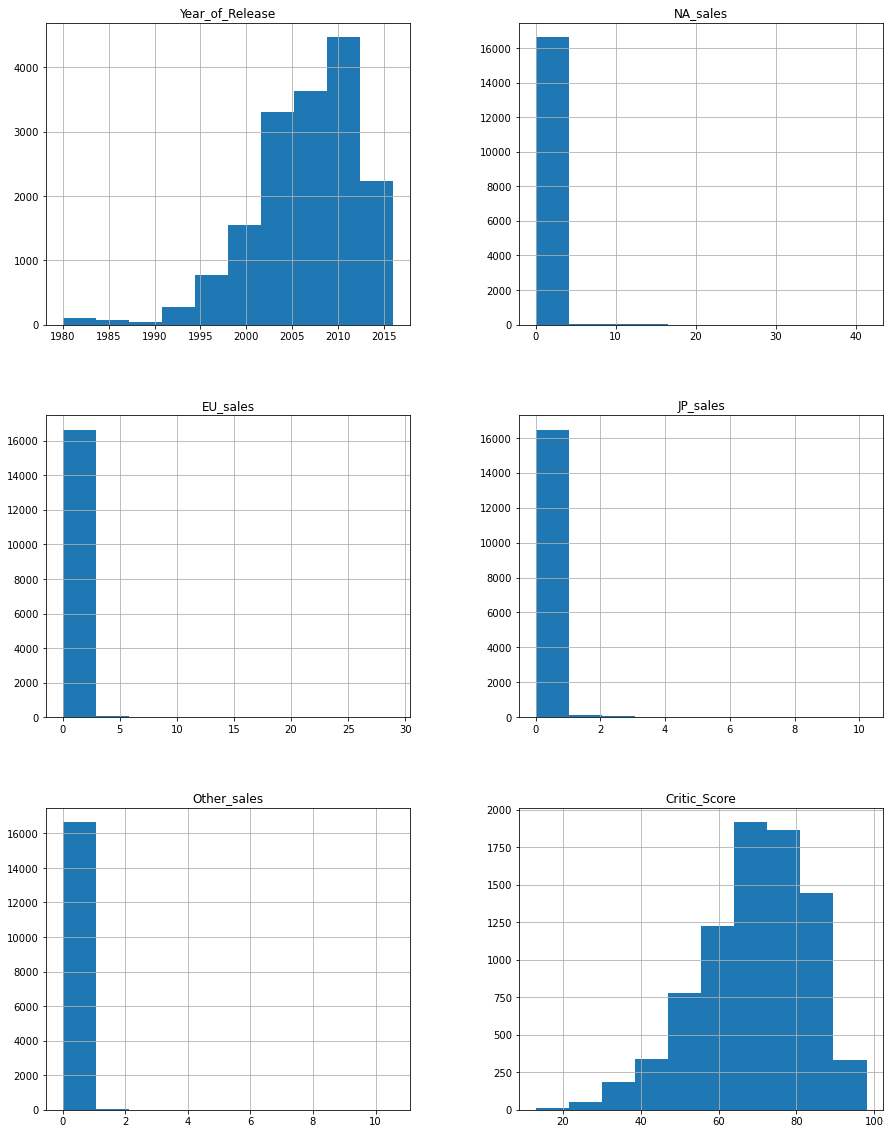

In [5]:
# построим гистограммы
df.hist(figsize=(15, 20)) 
plt.show()

**Мы получили данные и ознакомились с ними.** \
Нам предстоит поработать с данными, а именно – провести их предобработку для предстоящего анализа. В следующем шаге мы приведем данные к единому регистру, заменим типы данных, обработаем пропуски в данных, исключим аномальные значения, если такие будут выявлены.

## 2. Предобработка данных

### 2.1. Приведем названия всех столбцов в датафрэйме к змеиному регистру

In [6]:
# приведем названия всех столбцов в датафрэйме к змеиному регистру
df.columns = df.columns.str.lower() 

### 2.2. Проверим данные на пропуски

In [7]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

### 2.2.1. Обработаем пропуски в столбцах name, genre, year_of_release

In [8]:
# удалим строки, где не указаны данные и их количество незначительно
df = df.dropna(subset=['name'])
df = df.dropna(subset=['genre'])
df = df.dropna(subset=['year_of_release'])

### 2.2.2. Обработаем пропуски в столбцах critic_score и user_score

In [9]:
# заменим пропущенные значения в столбцах 'critic_score' и 'user_score' на маркер "-1" 
# так мы будем отличать игры, где оценки были не указаны
df['critic_score'] = df['critic_score'].fillna(-1) 
df['user_score'] = df['user_score'].fillna(-1) 

# заменим пропущенные значения в столбце 'rating' на маркер "no rating"
# так мы будем отличать игры, где не указан рейтинг ESRB

df['rating'] = df['rating'].fillna('no rating')

### 2.2.3. Рассмотрим подробнее столбец с оценками пользователей

In [10]:
df['user_score'].unique()

array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Среди числовых оценок видим 'tbd', что означает to be determined, то есть оценка еще не определена.

In [11]:
# посмотрим, сколько таких оценок tbd
df[df['user_score'] == 'tbd']['user_score'].count()

2376

Эти данные мы не сможем заполнить корректно, поэтому в этом случае их лучше заменить на маркеры, как мы делали с остальными пропусками в данном столбце.

In [12]:
df.loc[df['user_score'] == 'tbd','user_score'] = -1

In [13]:
# проверим результат заполнения пропусков
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Мы заполнили пропуски в данных, теперь можем изменить типы данных, где это необходимо.

### 2.3. Изменим типы данных

In [14]:
df['year_of_release']=df['year_of_release'].astype('int')
df['user_score']=df['user_score'].astype('float64')

In [15]:
# проверим корректность преобразований
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


**Мы заменили типы данных:**
* на 'int' в столбцах года выпуска, так как данные в этом столбце – это целые числа
* на 'float' в столбце с оценкой пользователей, так как это число, а не строка

### 2.4. Добавим новый столбец с суммарными продажами во всех регионах

In [16]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [17]:
# убедимся, что столбец добавлен
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,no rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,no rating,31.38


**Мы провели предобработку данных:**
1. Нашли пропуски – они могли появиться из-за ошибок при выгрузке данных или на момент сбора данных информация отсутствовала.  
2. Удалили те строки, количество которых было незначительно. Это не повлияет на дальнейший ход анализа.
3. Заменили на маркеры те пропуски, которые мы не смогли бы заполнить достоверно:
   * Медианными значениями заполнять оценки критиков и пользователей было бы некорректно, так как на оценку влияют различные факторы. 
   * Рейтинг от организации ESRB самостоятельно мы могли бы заполнить неверно, что могло бы привести к ошибочным выводам.
4. Изменили типы данных, где это было необходимо.
5. Добавили в датафрэйм столбец с суммарными продажами во всех регионах. Это нам пригодится для дальнейшего исследования.

# 3. Исследовательский анализ

### 3.1. Посмотрим, сколько игр выпускалось в разные годы

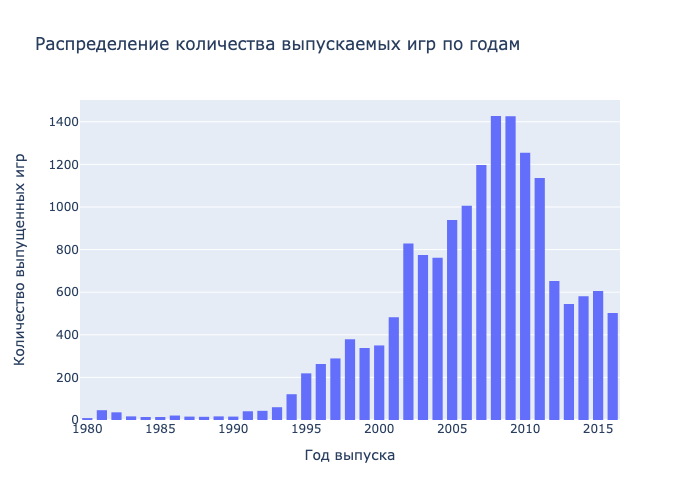

In [18]:
fig = px.histogram(df, x="year_of_release", title='Распределение количества выпускаемых игр по годам')
fig.update_layout(bargap=0.3)
fig.update_xaxes(title_text='Год выпуска')
fig.update_yaxes(title_text='Количество выпущенных игр')
fig.show()

Как мы видим по гистограмме, в период 1980-1994 гг. игр выпускалось не так много. Начиная с 1994 года, популярность компьютерных игр росла и их выпускали всё чаще. Однако заметен резкий спад после 2010 года. Рынок компьютерных игр развивается, они становятся всё более профессиональными и интересными. Всё это наталкивает на мысль, что данные за все периоды нам будут не нужны – только те, что будут актуальны на 2016 год.

### 3.1. Посмотрим на суммарные продажи в разбивке по платформам

In [19]:
# построим сводную таблицу с платформами и их суммарными продажами, выделим лидирующие платформы по продажам

top10_platform = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').nlargest(10, 'total_sales').reset_index()
top10_platform

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


In [20]:
# отберем имена платформ в список
top10_platform_name = top10_platform['platform'].to_list()

In [21]:
# построим сводную таблицу для всех платформ и их суммарных продаж
platform_totalsales = df.groupby(['year_of_release', 'platform'], as_index=False).agg(total_sales=('total_sales','sum'))
platform_totalsales.head(10)

,year_of_release,platform,total_sales
0,1980,2600,11.38
1,1981,2600,35.68
2,1982,2600,28.88
3,1983,2600,5.84
4,1983,NES,10.96
5,1984,2600,0.27
6,1984,NES,50.08
7,1985,2600,0.45
8,1985,DS,0.02
9,1985,NES,53.44


In [22]:
# отберем платформы из списка top10_platform_name
platform_totalsales = platform_totalsales[platform_totalsales['platform'].isin(top10_platform_name)]

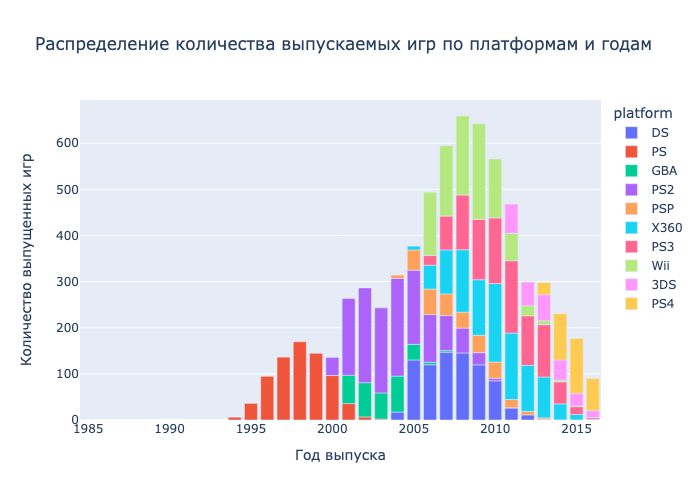

In [23]:
# визуализируем результат
fig = px.bar(platform_totalsales, x="year_of_release", y="total_sales", color="platform", title='Распределение количества выпускаемых игр по платформам и годам')
fig.update_xaxes(title_text='Год выпуска')
fig.update_yaxes(title_text='Количество выпущенных игр')
fig.show()

Как было видно на гистограмме ранее, в период 1980-1994 года игр производилось максимально мало (среди отобранных топ-10 платформ - не было почти ни одной). Исключим эти года для лучшего ознакомления с характерными сроками, когда появляются и исчезают новые платформы.

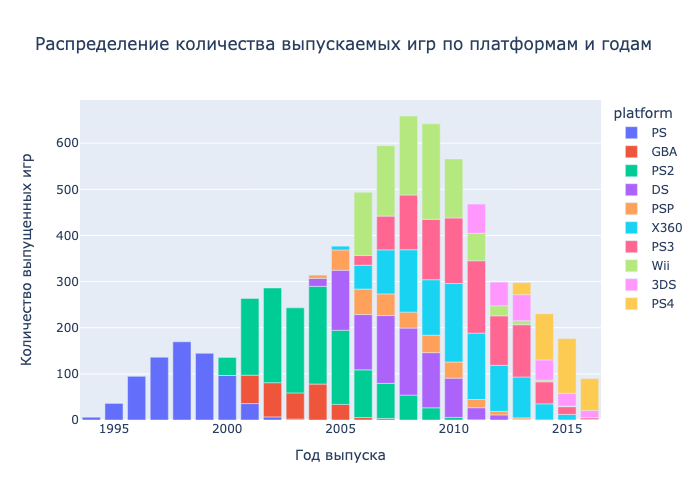

In [24]:
platform_totalsales = platform_totalsales[platform_totalsales['year_of_release'] >= 1994]
# визуализируем результат
fig = px.bar(platform_totalsales, x="year_of_release", y="total_sales", color="platform", title="Распределение количества выпускаемых игр по платформам и годам")
fig.update_xaxes(title_text='Год выпуска')
fig.update_yaxes(title_text='Количество выпущенных игр')
fig.show()

**Сроки появления и исчезновения платформ:**\
\
**PS:** 1994-2003 (9 лет)\
**GBA:** 2001-2007 (6 лет)\
**PS2:** 2000-2009 (9 лет)\
**DS:** 2004-2013 (9 лет)\
**PSP:** 2005-2012 (7 лет)\
**PS3:** 2006-2016 (10 лет)\
**Wii:** 2006-2014 (8 лет)\
**X360:** 2005-2016 (11 лет)\
**3DS:** 2011-2016 (5 лет)\
**PS4:** 2013-2016 (3 года - на момент 2016 года была еще популярна)

Посчитав среднее среди сроков существования платформ, получаем 7,7 лет.\
**7-8 лет - характерный срок существования платформ.**

Самая популярная платформа на момент исследования – PS4. **Актуальным для исследования будем считать срок, начиная с года выпуска этой платформы (2013-2016 гг.)**

### 3.2. Выделим актуальный период

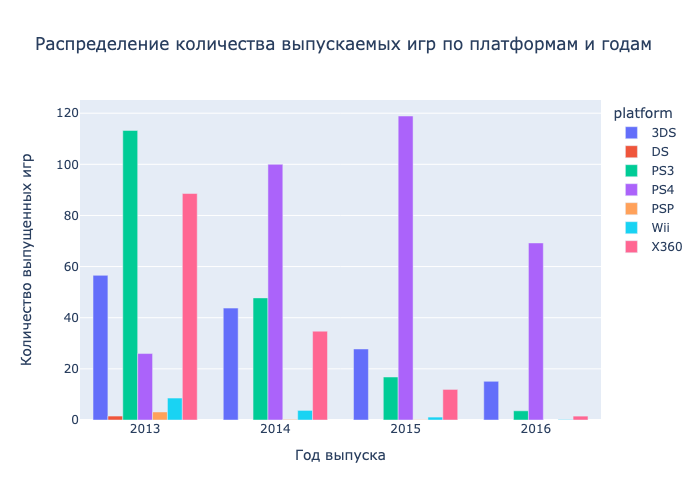

In [25]:
# выделим актуальный период для нашего исследования – 2013-2016 гг.
platform_totalsales = platform_totalsales[platform_totalsales['year_of_release'] >= 2013]

# визуализируем результат
fig = px.bar(platform_totalsales, x="year_of_release", y="total_sales", color="platform", barmode="group", title="Распределение количества выпускаемых игр по платформам и годам")
fig.update_xaxes(title_text='Год выпуска')
fig.update_yaxes(title_text='Количество выпущенных игр')
fig.show()

Как мы видим по нашей гистограмме:
* Продажи постепенно увеличивались у PS4, так что ее можно считать потенциально прибильной.
* Уменьшались постепенно продажи у 3DS, PS3, X360, но их также можно рассматривать, как актуальные на этот период.

### 3.3. Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

In [26]:
# создадим датафрэйм с данными за период 2013-2016гг
df_after_2013 = df.query('year_of_release >= 2013')

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

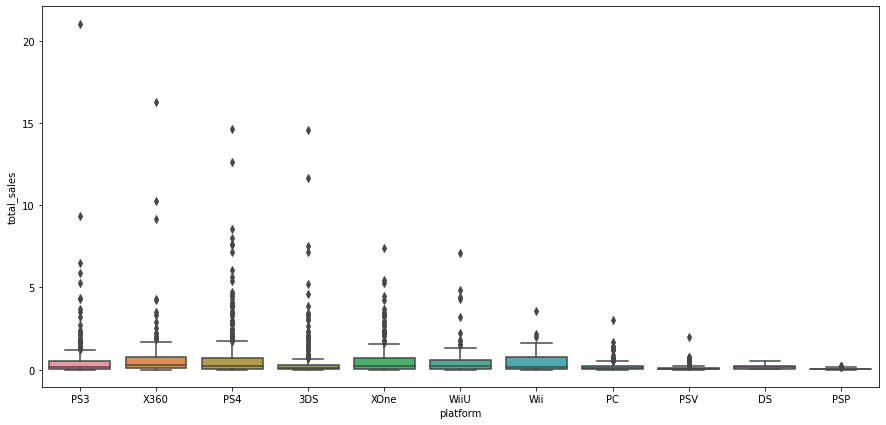

In [27]:
# визуализируем
plt.figure(figsize=(15,7))
sns.boxplot(
    data = df_after_2013,
    x = 'platform',
    y = 'total_sales',
)

По такому графике мы, конечно, не сможем сделать выводов, так как их сложно интерпретировать из-за большого количества выбросов. Но зато мы видим, что некоторые платформы были особенно популярными – например, PS3, у которой было продано 20 миллионов копий.

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

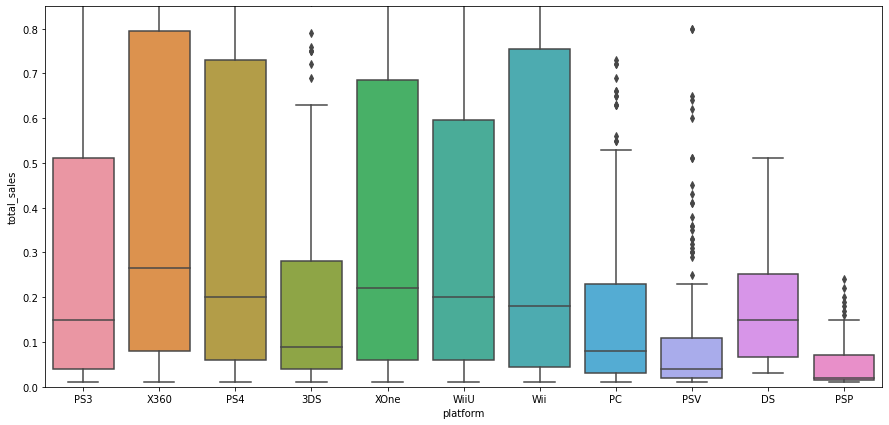

In [28]:
# зададим границы, чтобы лучше рассмотреть график

plt.figure(figsize=(15,7))
plt.ylim(0, 0.85)
sns.boxplot(
    data = df_after_2013,
    x = 'platform',
    y = 'total_sales',
)

In [29]:
df_after_2013.pivot_table(index='platform', values='total_sales', aggfunc='sum').nlargest(10, 'total_sales')

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


По диаграмме размаха мы видим, что значения достаточно сильно скошены вправо. Это может быть из-за особенно популярных игр для данных платформ, и эта особенность увеличивает суммарные продажи. PS4 лидирует и по суммарным продажам, и по средним (количество копий за игру). Также по средним продажам не сильно отстают X360 и Wii, чего не скажешь о суммарных продажах.

Если рассматривать медианные продажи, то тут лидируют X360, Wii,  XOne и WiiU.

### 3.4. Посмотрим, как влияют на продажи отзывы пользователей и критиков внутри популярной платформы PS4

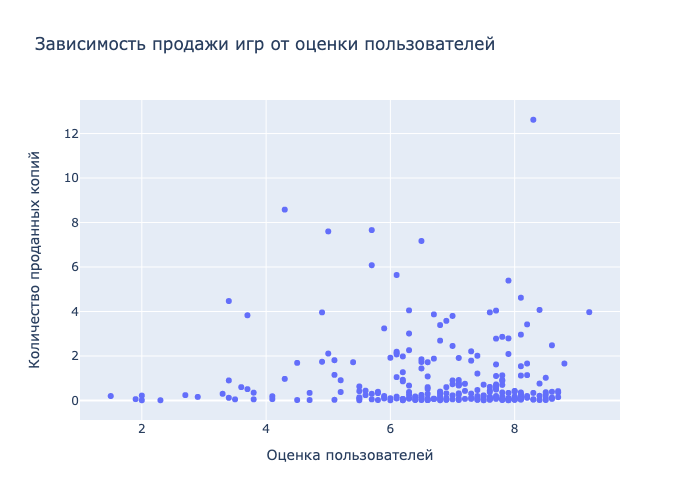

In [30]:
# постром диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами

# возьмём актуальные данные по PS4 и отссем оценки критиков и пользователей, которые мы пометили маркером "-1"
games_ps4 = df_after_2013.loc[(df_after_2013['platform'] == 'PS4')&(df_after_2013['user_score'] != -1)&(df_after_2013['critic_score'] != -1)]

fig = px.scatter(games_ps4, x="user_score", y="total_sales", title="Зависимость продажи игр от оценки пользователей")
fig.update_xaxes(title_text='Оценка пользователей')
fig.update_yaxes(title_text='Количество проданных копий')
fig.show()

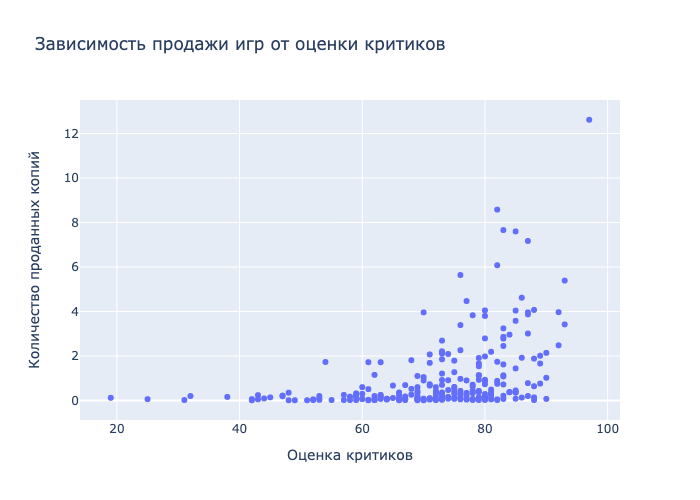

In [31]:
# постром диаграмму рассеяния и посчитаем корреляцию между оценками критиков и продажами
fig = px.scatter(games_ps4, x="critic_score", y="total_sales", title="Зависимость продажи игр от оценки критиков")
fig.update_xaxes(title_text='Оценка критиков')
fig.update_yaxes(title_text='Количество проданных копий')
fig.show()

In [32]:
games_ps4[['critic_score','user_score','total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.405895
user_score,0.557654,1.000000,-0.033625
total_sales,0.405895,-0.033625,1.000000


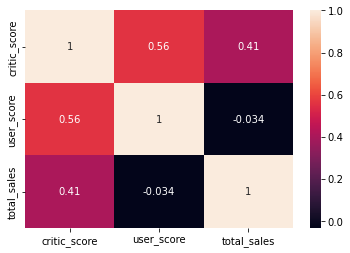

In [33]:
sns.heatmap(games_ps4[['critic_score','user_score','total_sales']].corr(), annot=True)
plt.show()

Как мы видим по диаграммам рассеяния и значениям корреляции, **связь между оценками критиков и продажами игра на PS4 есть, но небольшая** – 0.4.\
А вот **между оценками пользователей и продажами связи нет**, корреляция отрицательная (-0.03).

### 3.5. Посмотрим, как влияют на продажи отзывы пользователей и критиков внутри других популярных платформ: X360, 3DS, PS3

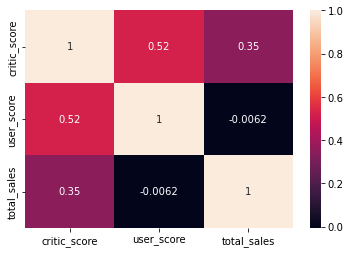

In [34]:
# корреляция – X360
games_x360 = df_after_2013.loc[(df_after_2013['platform'] == 'X360')&(df_after_2013['user_score'] != -1)&(df_after_2013['critic_score'] != -1)]
sns.heatmap(games_x360[['critic_score','user_score','total_sales']].corr(), annot=True)
plt.show()

Значения корреляции на X360 почти аналогичны. Оценка критиков – 0.35, а оценка пользователей отрицательная -0,006.

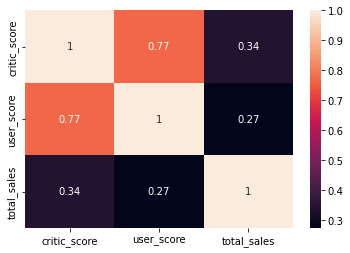

In [35]:
# корреляция – 3DS
games_3ds = df_after_2013.loc[(df_after_2013['platform'] == '3DS')&(df_after_2013['user_score'] != -1)&(df_after_2013['critic_score'] != -1)]
sns.heatmap(games_3ds[['critic_score','user_score','total_sales']].corr(), annot=True)
plt.show()

Значения корреляции на 3DS у оценки критиков почти аналогичны – 0.34, а корреляция у оценки пользователей выше, но все равно небольшая – 0,27.

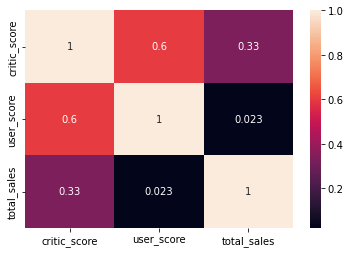

In [36]:
# корреляция – PS3
games_ps3 = df_after_2013.loc[(df_after_2013['platform'] == 'PS3')&(df_after_2013['user_score'] != -1)&(df_after_2013['critic_score'] != -1)]
sns.heatmap(games_ps3[['critic_score','user_score','total_sales']].corr(), annot=True)
plt.show()

Значения корреляции на PS3 у оценки критиков почти аналогичны – 0.33, оценка пользователей – 0,023.

### 3.6. Посмотрим корелляцию на других платформах вместе взятых (кроме PS4)

In [37]:
games_rest = df_after_2013.loc[(df_after_2013['platform'] != 'PS4')&(df_after_2013['user_score'] != -1)&(df_after_2013['critic_score'] != -1)]
games_rest[['critic_score','user_score','total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.484554,0.278749
user_score,0.484554,1.000000,0.006805
total_sales,0.278749,0.006805,1.000000


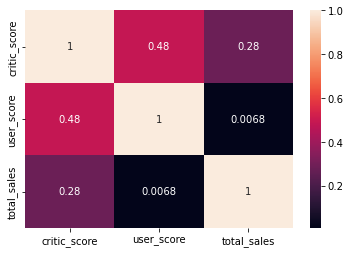

In [38]:
sns.heatmap(games_rest[['critic_score','user_score','total_sales']].corr(), annot=True)
plt.show()

Значения корреляции на других платформах почти аналогичны. Оценка критиков – 0.2, а оценка пользователей – 0.007.

### 3.7. Посмотрим на общее распределение игр по жанрам

In [39]:
# Соберём датафрэйм с жанрами и количеством медианных продаж 
genre_total_sales = df_after_2013.pivot_table(index='genre', values='total_sales', aggfunc='mean'
                                    ).sort_values(by='total_sales',ascending=False).reset_index()

display(genre_total_sales)

,genre,total_sales
0,Shooter,1.245882
1,Sports,0.703972
2,Platform,0.576081
3,Role-Playing,0.499623
4,Racing,0.469294
5,Fighting,0.441375
6,Action,0.420196
7,Misc,0.405290
8,Simulation,0.350968
9,Puzzle,0.186471


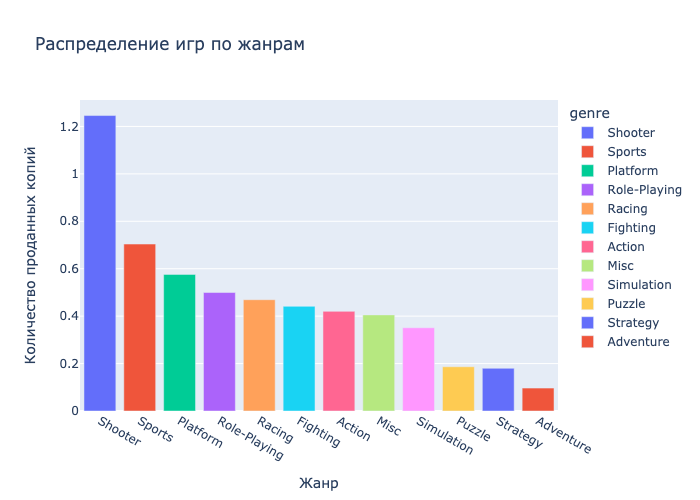

In [40]:
fig = px.bar(genre_total_sales, x="genre", y="total_sales", color="genre", title='Распределение игр по жанрам')
fig.update_xaxes(title_text='Жанр')
fig.update_yaxes(title_text='Количество проданных копий')
fig.show()

**Самый популярный жанр компьютерных игр, который отличается высокими медианными продажами** – Shooter.\
**Средние показатели по продажам** у жанров Sports и Platform.\
**Самые низкие продажи** у жанра Adventure.

### 3.8. Составим портрет пользователя каждого региона (Северная Америка, Европа, Япония)

Узнаем:
* Самые популярные платформы (топ-5). Опишем различия в долях продаж.
* Самые популярные жанры (топ-5). Поясним разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?


#### 3.8.1. Самые популярные платформы в регионах

In [41]:
# топ-5 популярных платформ в Северной Америке
top5_platform_na = df_after_2013.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales',ascending=False).nlargest(5, 'na_sales')


# топ-5 популярных платформ в Европе
top5_platform_eu = df_after_2013.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales',ascending=False).nlargest(5, 'eu_sales')


# топ-5 популярных платформ в Японии
top5_platform_jp = df_after_2013.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales',ascending=False).nlargest(5, 'jp_sales')

display(top5_platform_na)
display(top5_platform_eu)
display(top5_platform_jp)

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


#### 3.8.2. Самые популярные жанры в регионах

In [42]:
# топ-5 популярных жанров в Северной Америке
top5_genres_na = df_after_2013.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales',ascending=False).nlargest(5, 'na_sales')

# топ-5 популярных жанров в Европе
top5_genres_eu = df_after_2013.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales',ascending=False).nlargest(5, 'eu_sales')

# топ-5 популярных жанров в Европе
top5_genres_jp = df_after_2013.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales',ascending=False).nlargest(5, 'jp_sales')

display(top5_genres_na)
display(top5_genres_eu)
display(top5_genres_jp)

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


#### 3.8.3.  Рейтинг ESRB и продажи в регионах

Рейтинг ESRB:
* «EC» («Early childhood») — «Для детей младшего возраста»
* «E» («Everyone») — «Для всех»
* «E10+» («Everyone 10 and older») — «Для всех старше 10 лет»
* «T» («Teen») — «Подросткам»
* «M» («Mature») — «Для взрослых»
* «AO» («Adults Only 18+») — «Только для взрослых»
* «RP» («Rating Pending») — «Рейтинг ожидается»

In [43]:
df_after_2013['rating'].unique()

array(['M', 'no rating', 'E', 'T', 'E10+'], dtype=object)

In [44]:
# распределение по популярности рейтингов игр в Северной Америке
rating_na = df_after_2013.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales',ascending=False)

# распределение по популярности рейтингов игр в Европе
rating_eu = df_after_2013.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales',ascending=False)

# распределение по популярности рейтингов игр в Японии
rating_jp = df_after_2013.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales',ascending=False)

display(rating_na)
display(rating_eu)
display(rating_jp)

,na_sales
rating,
M,165.21
no rating,89.42
E,79.05
E10+,54.24
T,49.79


,eu_sales
rating,
M,145.32
E,83.36
no rating,78.91
E10+,42.69
T,41.95


,jp_sales
rating,
no rating,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


In [45]:
df_after_2013.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
738,Forza Motorsport 5,XOne,2013,Racing,1.21,0.79,0.01,0.19,79.0,5.9,E,2.20
3381,FIFA 15,PSV,2014,Sports,0.08,0.35,0.05,0.12,-1.0,3.1,E,0.60
9179,Homefront: The Revolution,XOne,2016,Shooter,0.06,0.07,0.00,0.01,49.0,4.1,M,0.14
16158,Raven's Cry,PS4,2015,Role-Playing,0.00,0.01,0.00,0.00,-1.0,-1.0,no rating,0.01
8072,Super Robot Taisen UX,3DS,2013,Role-Playing,0.00,0.00,0.18,0.00,-1.0,-1.0,no rating,0.18


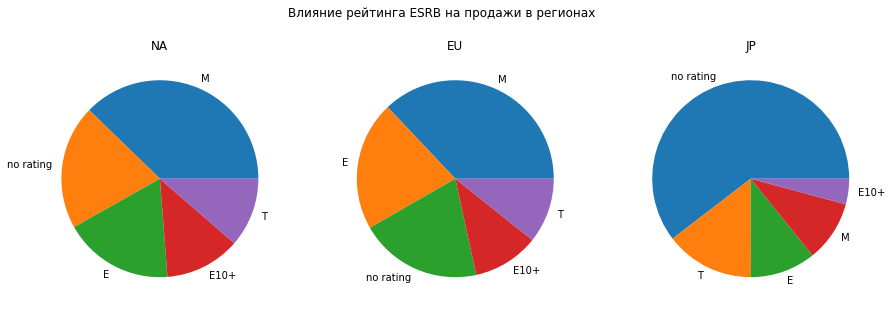

In [46]:
# визуализируем с помощью диаграмм

countries = df_after_2013.columns[4:7]
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Влияние рейтинга ESRB на продажи в регионах')
for i in range(3):
  # выберем 5 самых продающих платформ
    df_i = (df_after_2013.groupby('rating')[countries[i]].sum().
                reset_index().
                 sort_values(countries[i], ascending = False, ignore_index = True))

    axs[i].pie(df_i[countries[i]], labels = df_i['rating'])
  # зададим название региона
    axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

Основываясь на полученные данные по пользователям различных регионов, можем сделать вывод.

**1. Популярные платформы.**\
Топ-5 популярных платформ в Северной Америке и Европе открывает PS4. Следующие 3 места в разном порядке занимают: PS3, XOne, X360, а закрывает пятёрку лучших – 3DS. В Японии же наоборот самой популярной платформой является 3DS.

**2. Популярные жанры.**\
Топ-5 популярных жанров в Северной Америке и Европе почти полностью совпадает. На первом месте Action, затем – Shooter, Sports, Role-Playing. В Японии же лидирует жанр Role-Playing, затем Action, Misc, Fighting и Shooter.

**3. Рейтинг ESRB.**\
Популярные рейтинги в Северной Америке и Европе похожи. Самым популярным являетя «M» — «Для взрослых», «E» — «Для всех» и игры без рейтинга. В то время, как в Японии самыми популярными являются игры без рейтинга, а также для подростков («T»).

**Вывод:** эта часть исследования показала различие между запросами пользователей в регионах. Если в Северной Америке и Европе запросы схожи, то в Японии популярны другие платформы и жанры компьютерных игр, а также преобладают игры без рейтинга. Рейтинг ESRB – американский, и вполне вероятно, что у японцев свои рейтинги и свои игры. Это может быть обусловлено менталитетом и различными интересами.

## 4. Статистический анализ данных – проверка гипотез

**Перейдём к проверке гипотез:**
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
2. Средние пользовательские рейтинги жанров Action и Sports разные.


**Гипотеза №1 – Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Нулевая гипотеза H_0: Средние пользовательские рейтинги платформ Xbox One и PC равны.\
Альтернативная гипотеза H_1: Средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [47]:
#  cохраним в переменные данные из нашего актуального датафрэйма отдельно по XOne и PC

xone = df_after_2013.loc[(df_after_2013['platform'] == 'XOne')&(df_after_2013['user_score'] != -1)]['user_score']
pc = df_after_2013.loc[(df_after_2013['platform'] == 'PC')&(df_after_2013['user_score'] != -1)]['user_score']

alpha = .05 # критический уровень статичтической значимости

results = st.ttest_ind(
    xone,
    pc,
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-значение: 0.14759594013430463
Не удалось отвергнуть нулевую гипотезу


**Гипотеза №2 – Средние пользовательские рейтинги жанров Action и Sports разные**

Нулевая гипотеза H_0: Средние пользовательские рейтинги платформ жанров Action и Sports равны.\
Альтернативная гипотеза H_1: Средние пользовательские рейтинги платформ жанров Action и Sports не равны.

In [48]:
action = df_after_2013.loc[(df_after_2013['genre'] == 'Action')&(df_after_2013['user_score'] != -1)]['user_score']
sports = df_after_2013.loc[(df_after_2013['genre'] == 'Sports')&(df_after_2013['user_score'] != -1)]['user_score']

alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    action,
    sports,
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


**Вывод:**
1. Гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые оказалась верна. 
2. Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные также оказалась верна.

# 5. Подведение итогов и формулирование общего вывода

**Целью нашего исследования** было выявить закономерности, определяющие успешность игры, которые позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Нашими задачами было, узнать**:
1. Сколько игр выпускалось в разные годы и понять, важны ли данные за все периоды.
2. Как менялись продажи по платформам.
3. Какой период для нашего исследования будет актуальным – данные за этот период помогут построить прогноз на 2017 год.
4. Какие платформы лидируют по продажам и выберем несколько потенциально прибыльных платформ.
5. Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
6. Самые прибыльные жанры и выделяются ли жанры с высокими и низкими продажами.
7. Портреты пользователей.
8. Подтвердятся ли гипотезы.

**В ходе исследования** мы ознакомились с данными, нашли в них проблемы и провели предобработку данных (привели к нижнему регистру названия столбцов, заменили пропуски на маркеры, где это было возможно, удалили те строки с пропусками, количество которых было не критичным, изменили типы данных, где это требовалось), провели исследовательский анализ данных, составили портрет пользователя каждого региона (Северная Америка, Европа, Япония), провели статистический анализ для проверки гипотез. Мы готовы сделать финальные выводы и предложить рекомендации для планирования рекламных кампаний.

**Мы получили следующие результаты:**

1. В период 1980-1994гг. компьютерных игр выпускалось мало. Начиная с 1994 года, популярность игр росла, и их выпускали всё больше. Однако был заметен резкий спад после 2010 года, который возможно был связан с развитием игр на мобильных телефонах (с появлением iPhone началась новая эра развития мобильных игр). Но рынок компьютерных игр развивался дальше и продолжает это делать до сих пор, игры становятся всё более профессиональными и интересными. Всё это наталкнуло на мысль, что данные за все периоды нам будут не нужны и в нам нужно оставить только те, что будут актуальны на 2016 год.
2. Выбрав 10 платформ с наибольшими суммарными продажами и построив распределение по годам, мы узнали, что 7-8 лет – характерный срок существования платформ. А самой популярной платформой на момент нашего исследования является – PS4. 
3. Актуальным для исследования в итоге мы выбрали период 2013-2016, так как именно в 2013 году была выпущена платформа PS4. Данные за этот период позволят сделать прогноз на 2017 год.
4. По глобальным продажам за актуальный период лидирует PS4. Платформы, которые тоже приносили большой доход по медианным продажам –  X360, Wii,  XOne и WiiU.
5. Мы выяснили, что особой зависимости между продажами игр и оценками пользователей нет. Однако небольшая зависимость прослеживается между продажами и оценками критиков. Есть вероятность, что некоторые покупатели сначала изучают рецензии критиков, после чего только приобретают игру.
6. Самыми популярными жанрами компьютерных игр, которые отличаются высокими продажами являются Shooter. Средние показатели по продажам – Sports и Platform. Самые низкие продажи – Adventure.
7. Портреты пользователей разных регионов показали различие между ними. Если в Северной Америке и Европе запросы схожи, то в Японии популярны другие платформы и жанры компьютерных игр, а также преобладают игры без рейтинга. Это может быть обусловлено менталитетом и различными интересами народов.
8. Гипотезы, которые были обозначены в начале исследования, оказались верны. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а жанров Action и Sports – разные.

**Рекомендации на 2017 год**

Мы выяснили, что портреты пользователей различаются в зависимости от региона, где они проживают. Отсюда следуют такие рекомендации: 
1. Игры стоит продвигать, которые выходят на платформах PS4, PS3 и XOne для Северной Америки и Европы. На платформе 3DS - для Японии.
2.  В Северной Америке и Европе пользуются спросом игры с рейтингом ESRB «M», а в Японии более популярными являются игры без рейтинга или для подростков («T»).
3. Предпочтительным жанром Северной Америке и Европе является Action, а для Японии – Role-Playing.